## Data Analysis
### Run details:
+ NS_max_iter 10000000 
+ NS_sampling_efficiency 0.15
+ NS_evidence_tolerance 0.8
+ NS_n_live_points 1000 


In [1]:
#Show plots inline, and load main getdist plot module and samples class
from __future__ import print_function
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
import getdist, IPython
import pylab as plt
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
#matplotlib 2 doesn't seem to work well without usetex on
plt.rcParams['text.usetex']=True

import numpy as np 

GetDist Version: 1.1.2, Matplotlib version: 3.3.2


In [2]:
planck1 = np.loadtxt('/home/zcapjru/Master_Thesis/Thesis_data/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_1.txt')
planck2 = np.loadtxt('/home/zcapjru/Master_Thesis/Thesis_data/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_2.txt')
planck3 = np.loadtxt('/home/zcapjru/Master_Thesis/Thesis_data/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_3.txt')
planck4 = np.loadtxt('/home/zcapjru/Master_Thesis/Thesis_data/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5_4.txt')

planck_tot = np.concatenate((planck1, planck2, planck3, planck4), axis=0)
names_planck= np.loadtxt('/home/zcapjru/Master_Thesis/Thesis_data/PLANCK/Planck_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_post_zre6p5.paramnames', dtype=np.str, usecols=[0])

In [3]:
labels_kv = ['\omega_{cdm}', 'ln10^{10}A_{s}', '\omega_{b}', 'n_{s}', 'h', 'A_{IA}', 'c_{min}',
             'dc', '\Omega_{m}', '\sigma_8', 'S_{8}']
names_kv = ['omega_cdm', 'ln10^10A_s', 'omega_b', 'n_s', 'h', 'A_IA', 
'c_min', 'dc', 'Omega_m', 'sigma8', 'S8']

names_planck = ['omega_cdm', 'omega_b', 'ln10^10A_s', 'n_s', 'h', 'Omega_m', 'sigma8', 'S8']
labels_planck = ['\omega_{cdm}', '\omega_b', '\ln10^{10}A_s', 'n_s', 'h', '\Omega_m', '\sigma_8', 'S_8']

names_comp = [ 'Omega_m_geo', 'sigma8_geo', 'S8_geo', 'Omega_m_gro', 'sigma8_gro', 'S8_gro']
labels_comp = [ '\Omega_m^{geo}', '\sigma_8^{geo}', 'S_8^{geo}', '\Omega_m^{gro}', '\sigma_8^{gro}', 'S_8^{gro}']

In [4]:
planck = []
for item in planck_tot:
    planck.append([(item[29]/100)*(item[29]/100)*(item[31] - item[2]), item[2], item[6], item[7], item[29]/100, item[31], item[34], item[35]])
planck = np.array(planck)

planck_getdist= MCSamples(samples=planck, names = names_planck, labels = labels_planck, label= 'Planck 2018',
                    weights=np.transpose(planck_tot)[0],loglikes=np.transpose(planck_tot)[1])

Removed no burn in


# Load 1 cosmo 

In [5]:
KV_ext_1cosmo = np.loadtxt('Summer_Paper_2020/paper_results_analysis/1COSMO/kv_1cosmo/chain_NS__accepted.txt')
KVSS_ext_1cosmo = np.loadtxt('Summer_Paper_2020/paper_results_analysis/1COSMO/kvss_1csm/chain_NS__accepted.txt')
KVSS_lym_1cosmo = np.loadtxt('Summer_Paper_2020/paper_results_analysis/1COSMO/kvss_lym_1csm/chain_NS__accepted.txt')
KVSS_lym_CMB_1cosmo = np.loadtxt('Summer_Paper_2020/paper_results_analysis/1COSMO/kvss_lymCMB_1csm/chain_NS__accepted.txt')

KV_cmb_1cosmo = np.loadtxt('Summer_Paper_2020/paper_results_analysis/1COSMO/kv_cmb_1cms/chain_NS__accepted.txt')
KV_lym_1cosmo = np.loadtxt('Summer_Paper_2020/paper_results_analysis/1COSMO/kv_lym_1csm/chain_NS__accepted.txt')
KV_lym_CMB_1cosmo = np.loadtxt('Summer_Paper_2020/paper_results_analysis/1COSMO/kv_lymcmb_1csm/chain_NS__accepted.txt')


In [6]:
#KV 1cosmo
kv_1cosmo = []
for item in KV_ext_1cosmo:
    kv_1cosmo.append([item[2], item[3], item[4], item[5], item[6], item[7], item[8], item[9],
                           item[-2], item[-1], item[-1]*np.sqrt(item[-2]/.3)])
kv_1cosmo = np.array(kv_1cosmo)


#KVSS 1cosmo
kvss_1cosmo = []
for item in KVSS_ext_1cosmo:
    kvss_1cosmo.append([item[2], item[3], item[4], item[5], item[6], item[7], item[8], item[9],
                          item[-2], item[-1], item[-1]*np.sqrt(item[-2]/.3)])
kvss_1cosmo = np.array(kvss_1cosmo)

#KVSS lyman 1cosmo
kvss_lym_1cosmo = []
for item in KVSS_lym_1cosmo:
    kvss_lym_1cosmo.append([item[2], item[3], item[4], item[5], item[6], item[7], item[8], item[9],
                           item[-7], item[-6], item[-6]*np.sqrt(item[-7]/.3)])
kvss_lym_1cosmo = np.array(kvss_lym_1cosmo)

#KVSS Lyman CMB 1cosmo
kvss_lyman_cmb_1cosmo = []
for item in KVSS_lym_CMB_1cosmo:
    kvss_lyman_cmb_1cosmo.append([item[2], item[3], item[4], item[5], item[6], item[7], item[8], item[9],
                           item[-2], item[-1], item[-1]*np.sqrt(item[-2]/.3)])
kvss_lyman_cmb_1cosmo = np.array(kvss_lyman_cmb_1cosmo)

#KV CMB 1cosmo
kv_cmb_1cosmo = []
for item in KV_cmb_1cosmo:
    kv_cmb_1cosmo.append([item[2], item[3], item[4], item[5], item[6], item[7], item[8], item[9],
                          item[-2], item[-1], item[-1]*np.sqrt(item[-2]/.3)])
kv_cmb_1cosmo = np.array(kv_cmb_1cosmo)

#KV lyman 1cosmo
kv_lym_1cosmo = []
for item in KV_lym_1cosmo:
    kv_lym_1cosmo.append([item[2], item[3], item[4], item[5], item[6], item[7], item[8], item[9],
                           item[-7], item[-6], item[-6]*np.sqrt(item[-7]/.3)])
kv_lym_1cosmo = np.array(kv_lym_1cosmo)

#KV Lyman CMB 1cosmo
#dz and omg_m and sig8 got mixed
kv_lym_cmb_1cosmo = []
for item in KV_lym_CMB_1cosmo:
    kv_lym_cmb_1cosmo.append([item[2], item[3], item[4], item[5], item[6], item[7], item[8], item[9],
                           item[11], item[12], item[12]*np.sqrt(item[11]/.3)])
kv_lym_cmb_1cosmo = np.array(kv_lym_cmb_1cosmo)


In [7]:
#CMB
#cmb_nolg_1cosmo = []
#for item in CMB_nolg_1cosmo:
#    cmb_nolg_1cosmo.append([ item[2], item[3], item[4], item[5], item[6],item[-2], item[-1], item[-1]*np.sqrt(item[-2]/.3)])
#cmb_nolg_1cosmo = np.array(cmb_nolg_1cosmo)

#BOSS
#boss_1cosmo = []
#for item in BOSS_1cosmo:
#    boss_1cosmo.append([ item[2], item[3], item[4], item[5], item[6],item[-2], item[-1], item[-1]*np.sqrt(item[-2]/.3)])
#boss_1cosmo = np.array(boss_1cosmo)

#lyman14 1cosmo
#lym14_1cosmo = []
#for item in LYM14_1cosmo:
#    lym14_1cosmo.append([item[2], item[3], item[4], item[5], item[6],item[-2], item[-1], item[-1]*np.sqrt(item[-2]/.3)])
#lym14_1cosmo = np.array(lym14_1cosmo)

# Load 2 cosmo 

In [8]:
#KV nuisance
KV_nuisance = np.loadtxt('Summer_Paper_2020/paper_results_analysis/2COSMOS/kv_nuisance/chain_NS__accepted.txt')
#KV mark3
KV_mark3 = np.loadtxt('Summer_Paper_2020/paper_results_analysis/2COSMOS/kv_mark3/chain_NS__accepted.txt')
#KVSS mark3
KVSS_mark3 = np.loadtxt('Summer_Paper_2020/paper_results_analysis/2COSMOS/kvss_mark3/chain_NS__accepted.txt')
#KVSS lyman mark3
KVSS_lym_mark3 = np.loadtxt('Summer_Paper_2020/paper_results_analysis/2COSMOS/kvss_lym/chain_NS__accepted.txt')
#KVSS lyman CMB mark3
KVSS_lym_CMB_mark3 = np.loadtxt('Summer_Paper_2020/paper_results_analysis/2COSMOS/kvss_lym_CMB/chain_NS__accepted.txt')

#KV cmb
KV_cmb = np.loadtxt('Summer_Paper_2020/paper_results_analysis/2COSMOS/kv_cmb/chain_NS__accepted.txt')
#KV lyman
KV_lym = np.loadtxt('Summer_Paper_2020/paper_results_analysis/2COSMOS/kv_lyman/chain_NS__accepted.txt')
#KV lyman CMB 
KV_lym_CMB = np.loadtxt('Summer_Paper_2020/paper_results_analysis/2COSMOS/kv_lym_cmb/chain_NS__accepted.txt')



In [9]:
#KV nuisance 2cosmo
kv_n_gro = []
kv_n_geo = []
for item in KV_nuisance:
    kv_n_gro.append([item[2], item[3], item[4], item[5], item[6], item[12], item[13], item[15], 
                      item[-4], item[-3], item[-3]*np.sqrt(item[-4]/.3)])
    kv_n_geo.append([item[7], item[8], item[9], item[10], item[11], item[12], item[14], item[15],
                      item[-2], item[-1], item[-1]*np.sqrt(item[-2]/.3)])
kv_n_gro = np.array(kv_n_gro)
kv_n_geo = np.array(kv_n_geo)

In [10]:
#KV mark3
kv_mark3_gro = []
kv_mark3_geo = []
kv_mark3_comp = []
for item in KV_mark3:
    kv_mark3_gro.append([item[2], item[3], item[4], item[5], item[6], item[12], item[14], item[16], 
                      item[23], item[24], item[24]*np.sqrt(item[23]/.3)])
    kv_mark3_geo.append([item[7], item[8], item[9], item[10], item[11], item[13], item[15], item[17],
                      item[25], item[26], item[26]*np.sqrt(item[25]/.3)])
    kv_mark3_comp.append([item[25], item[26], item[26]*np.sqrt(item[25]/.3), item[23], item[24], item[24]*np.sqrt(item[23]/.3)])
kv_mark3_gro = np.array(kv_mark3_gro)
kv_mark3_geo = np.array(kv_mark3_geo)
kv_mark3_comp = np.array(kv_mark3_comp)

In [11]:
#KV lym
kv_lym_gro = []
kv_lym_geo = []
kv_lym_comp = []
for item in KV_lym:
    kv_lym_gro.append([item[2], item[3], item[4], item[5], item[6], item[12], item[14], item[16], 
                      item[23], item[24], item[24]*np.sqrt(item[23]/.3)])
    kv_lym_geo.append([item[7], item[8], item[9], item[10], item[11], item[13], item[15], item[17],
                      item[25], item[26], item[26]*np.sqrt(item[25]/.3)])
    kv_lym_comp.append([item[25], item[26], item[26]*np.sqrt(item[25]/.3), item[23], item[24], item[24]*np.sqrt(item[23]/.3)])
kv_lym_gro = np.array(kv_lym_gro)
kv_lym_geo = np.array(kv_lym_geo)
kv_lym_comp = np.array(kv_lym_comp)

In [12]:
#KV cmb
kv_cmb_gro = []
kv_cmb_geo = []
kv_cmb_comp = []
for item in KV_cmb:
    kv_cmb_gro.append([item[2], item[3], item[4], item[5], item[6], item[12], item[14], item[16], 
                      item[23], item[24], item[24]*np.sqrt(item[23]/.3)])
    kv_cmb_geo.append([item[7], item[8], item[9], item[10], item[11], item[13], item[15], item[17],
                      item[25], item[26], item[26]*np.sqrt(item[25]/.3)])
    kv_cmb_comp.append([item[25], item[26], item[26]*np.sqrt(item[25]/.3), item[23], item[24], item[24]*np.sqrt(item[23]/.3)])
kv_cmb_gro = np.array(kv_cmb_gro)
kv_cmb_geo = np.array(kv_cmb_geo)
kv_cmb_comp = np.array(kv_cmb_comp)

In [13]:
#KV lym cmb
kv_lymcmb_gro = []
kv_lymcmb_geo = []
for item in KV_lym_CMB:
    kv_lymcmb_gro.append([item[2], item[3], item[4], item[5], item[6], item[12], item[14], item[16], 
                      item[23], item[24], item[24]*np.sqrt(item[23]/.3)])
    kv_lymcmb_geo.append([item[7], item[8], item[9], item[10], item[11], item[13], item[15], item[17],
                      item[25], item[26], item[26]*np.sqrt(item[25]/.3)])
kv_lymcmb_gro = np.array(kv_lymcmb_gro)
kv_lymcmb_geo = np.array(kv_lymcmb_geo)

In [14]:
#KVSS mark3
kvss_mark3_gro = []
kvss_mark3_geo = []
kvss_mark3_comp = []
for item in KVSS_mark3:
    kvss_mark3_gro.append([item[2], item[3], item[4], item[5], item[6], item[12], item[14], item[16], 
                      item[23], item[24], item[24]*np.sqrt(item[23]/.3)])
    kvss_mark3_geo.append([item[7], item[8], item[9], item[10], item[11], item[13], item[15], item[17],
                      item[25], item[26], item[26]*np.sqrt(item[25]/.3)])
    kvss_mark3_comp.append([item[25], item[26], item[26]*np.sqrt(item[25]/.3), item[23], item[24], item[24]*np.sqrt(item[23]/.3)])
kvss_mark3_gro = np.array(kvss_mark3_gro)
kvss_mark3_geo = np.array(kvss_mark3_geo)
kvss_mark3_comp = np.array(kvss_mark3_comp)

In [15]:
#KVSS lym mark3
kvss_lym_mark3_gro = []
kvss_lym_mark3_geo = []
kvss_lym_mark3_comp = []
for item in KVSS_lym_mark3:
    kvss_lym_mark3_gro.append([item[2], item[3], item[4], item[5], item[6], item[12], item[14], item[16], 
                      item[23], item[24], item[24]*np.sqrt(item[23]/.3)])
    kvss_lym_mark3_geo.append([item[7], item[8], item[9], item[10], item[11], item[13], item[15], item[17],
                      item[25], item[26], item[26]*np.sqrt(item[25]/.3)])
    kvss_lym_mark3_comp.append([item[25], item[26], item[26]*np.sqrt(item[25]/.3), item[23], item[24], item[24]*np.sqrt(item[23]/.3)])
    
kvss_lym_mark3_gro = np.array(kvss_lym_mark3_gro)
kvss_lym_mark3_geo = np.array(kvss_lym_mark3_geo)
kvss_lym_mark3_comp = np.array(kvss_lym_mark3_comp)

In [16]:
#KVSS lym CMB mark3
kvss_lym_CMB_mark3_gro = []
kvss_lym_CMB_mark3_geo = []
kvss_lym_CMB_mark3_comp = []
for item in KVSS_lym_CMB_mark3:
    kvss_lym_CMB_mark3_gro.append([item[2], item[3], item[4], item[5], item[6], item[12], item[14], item[16], 
                      item[23], item[24], item[24]*np.sqrt(item[23]/.3)])
    kvss_lym_CMB_mark3_geo.append([item[7], item[8], item[9], item[10], item[11], item[13], item[15], item[17],
                      item[25], item[26], item[26]*np.sqrt(item[25]/.3)])
    kvss_lym_CMB_mark3_comp.append([item[25], item[26], item[26]*np.sqrt(item[25]/.3), item[23], item[24], item[24]*np.sqrt(item[23]/.3)])
    
kvss_lym_CMB_mark3_gro = np.array(kvss_lym_CMB_mark3_gro)
kvss_lym_CMB_mark3_geo = np.array(kvss_lym_CMB_mark3_geo)
kvss_lym_CMB_mark3_comp = np.array(kvss_lym_CMB_mark3_comp)

## Preparing Samples

In [17]:
KV_getdist = MCSamples(samples= kv_1cosmo, names = names_kv, labels = labels_kv, 
                     label = 'WL', weights = np.transpose(KV_ext_1cosmo)[0],loglikes = np.transpose(KV_ext_1cosmo)[1])
KVSS_getdist = MCSamples(samples= kvss_1cosmo, names = names_kv, labels = labels_kv, 
                     label = 'WL+Clustering', weights = np.transpose(KVSS_ext_1cosmo)[0],loglikes = np.transpose(KVSS_ext_1cosmo)[1])
KVSS_lym_getdist = MCSamples(samples= kvss_lym_1cosmo, names = names_kv, labels = labels_kv, 
                     label = 'WL+BOSS+Lya', weights = np.transpose(KVSS_lym_1cosmo)[0],loglikes = np.transpose(KVSS_lym_1cosmo)[1])
KVSS_lym_cmb_getdist = MCSamples(samples= kvss_lyman_cmb_1cosmo, names = names_kv, labels = labels_kv, 
                     label = 'WL+BOSS+Lya+CMB', weights = np.transpose(KVSS_lym_CMB_1cosmo)[0],loglikes = np.transpose(KVSS_lym_CMB_1cosmo)[1])

KV_cmb_getdist = MCSamples(samples= kv_cmb_1cosmo, names = names_kv, labels = labels_kv, 
                     label = 'WL+CMB', weights = np.transpose(KV_cmb_1cosmo)[0],
                           loglikes = np.transpose(KV_cmb_1cosmo)[1])
KV_lym_getdist = MCSamples(samples= kv_lym_1cosmo, names = names_kv, labels = labels_kv, 
                     label = 'WL+Lya', weights = np.transpose(KV_lym_1cosmo)[0],
                           loglikes = np.transpose(KV_lym_1cosmo)[1])
KV_lym_cmb_getdist = MCSamples(samples= kv_lym_cmb_1cosmo, names = names_kv, labels = labels_kv, 
                     label = 'WL+Lya+CMB', weights = np.transpose(KV_lym_CMB_1cosmo)[0],
                               loglikes = np.transpose(KV_lym_CMB_1cosmo)[1])
###
KV_n_gro_getdist = MCSamples(samples= kv_n_gro, names = names_kv, labels = labels_kv, 
                     label = 'WL n gro', weights = np.transpose(KV_nuisance)[0],loglikes = np.transpose(KV_nuisance)[1])
KV_n_geo_getdist = MCSamples(samples= kv_n_geo, names = names_kv, labels = labels_kv, 
                     label = 'WL n geo', weights = np.transpose(KV_nuisance)[0],loglikes = np.transpose(KV_nuisance)[1])
KV_mark3_gro_getdist = MCSamples(samples= kv_mark3_gro, names = names_kv, labels = labels_kv, 
                     label = 'WL gro', weights = np.transpose(KV_mark3)[0],loglikes = np.transpose(KV_mark3)[1])
KV_mark3_geo_getdist = MCSamples(samples= kv_mark3_geo, names = names_kv, labels = labels_kv, 
                     label = 'WL geo', weights = np.transpose(KV_mark3)[0],loglikes = np.transpose(KV_mark3)[1])
KVSS_mark3_gro_getdist = MCSamples(samples= kvss_mark3_gro, names = names_kv, labels = labels_kv, 
                     label = 'WL+Clustering Gro', weights = np.transpose(KVSS_mark3)[0],loglikes = np.transpose(KVSS_mark3)[1])
KVSS_mark3_geo_getdist = MCSamples(samples= kvss_mark3_geo, names = names_kv, labels = labels_kv, 
                     label = 'WL+Clustering Geo', weights = np.transpose(KVSS_mark3)[0],loglikes = np.transpose(KVSS_mark3)[1])
KVSS_lym_mark3_gro_getdist = MCSamples(samples= kvss_lym_mark3_gro, names = names_kv, labels = labels_kv, 
                    label = 'WL+Clustering+Lya Gro', weights = np.transpose(KVSS_lym_mark3)[0],
                                       loglikes = np.transpose(KVSS_lym_mark3)[1])
KVSS_lym_mark3_geo_getdist = MCSamples(samples= kvss_lym_mark3_geo, names = names_kv, labels = labels_kv, 
                   label = 'WL+Clustering+Lya Geo', weights = np.transpose(KVSS_lym_mark3)[0],
                                      loglikes = np.transpose(KVSS_lym_mark3)[1])
KVSS_lym_CMB_mark3_gro_getdist = MCSamples(samples= kvss_lym_CMB_mark3_gro, names = names_kv, labels = labels_kv, 
                    label = 'WL+Clustering+Lya+CMB Gro', weights = np.transpose(KVSS_lym_CMB_mark3)[0],
                                       loglikes = np.transpose(KVSS_lym_CMB_mark3)[1])
KVSS_lym_CMB_mark3_geo_getdist = MCSamples(samples= kvss_lym_CMB_mark3_geo, names = names_kv, labels = labels_kv, 
                   label = 'WL+Clustering+Lya+CMB Geo', weights = np.transpose(KVSS_lym_CMB_mark3)[0],
                                      loglikes = np.transpose(KVSS_lym_CMB_mark3)[1])
###
KV_cmb_gro_getdist = MCSamples(samples= kv_cmb_gro, names = names_kv, labels = labels_kv, 
                     label = 'WL+CMB gro', weights = np.transpose(KV_cmb)[0],
                               loglikes = np.transpose(KV_cmb)[1])
KV_cmb_geo_getdist = MCSamples(samples= kv_cmb_geo, names = names_kv, labels = labels_kv, 
                     label = 'WL+CMB geo', weights = np.transpose(KV_cmb)[0],
                               loglikes = np.transpose(KV_cmb)[1])

KV_lym_gro_getdist = MCSamples(samples= kv_lym_gro, names = names_kv, labels = labels_kv, 
                     label = 'WL+Lya Gro', weights = np.transpose(KV_lym)[0],
                               loglikes = np.transpose(KV_lym)[1])
KV_lym_geo_getdist = MCSamples(samples= kv_lym_geo, names = names_kv, labels = labels_kv, 
                     label = 'WL+Lya Geo', weights = np.transpose(KV_lym)[0],
                               loglikes = np.transpose(KV_lym)[1])

KV_lymcmb_gro_getdist = MCSamples(samples= kv_lymcmb_gro, names = names_kv, labels = labels_kv, 
                    label = 'WL+Lya+CMB Gro', weights = np.transpose(KV_lym_CMB)[0],
                                       loglikes = np.transpose(KV_lym_CMB)[1])
KV_lymcmb_geo_getdist = MCSamples(samples= kv_lymcmb_geo, names = names_kv, labels = labels_kv, 
                   label = 'WL+Lya+CMB Geo', weights = np.transpose(KV_lym_CMB)[0],
                                      loglikes = np.transpose(KV_lym_CMB)[1])
###
#CMB_nolg_getdist = MCSamples(samples= cmb_nolg_1cosmo, names = names_cmb, labels = labels_cmb, 
#                     label = 'CMB', weights = np.transpose(CMB_nolg_1cosmo)[0],
#                                         loglikes = np.transpose(CMB_nolg_1cosmo)[1])
#BOSS_getdist = MCSamples(samples= boss_1cosmo, names = names_cmb, labels = labels_cmb, 
#                     label = 'Clustering', weights = np.transpose(BOSS_1cosmo)[0],
#                                         loglikes = np.transpose(BOSS_1cosmo)[1])
#lym14_getdist = MCSamples(samples= lym14_1cosmo, names = names_cmb, labels = labels_cmb, 
#                     label = 'Lya', weights = np.transpose(LYM14_1cosmo)[0],
#                                         loglikes = np.transpose(LYM14_1cosmo)[1])
###
planck_getdist= MCSamples(samples=planck, names = names_planck, labels = labels_planck, label= 'Planck 2018',
                    weights=np.transpose(planck_tot)[0],loglikes=np.transpose(planck_tot)[1])

###
comp_kv = MCSamples(samples= kv_mark3_comp, names = names_comp, labels = labels_comp, 
                     label = 'WL',weights = np.transpose(KV_mark3)[0],loglikes = np.transpose(KV_mark3)[1])
comp_kvss = MCSamples(samples= kvss_mark3_comp, names = names_comp, labels = labels_comp, 
                     label = 'WL+Clustering',weights = np.transpose(KVSS_mark3)[0],
                                      loglikes = np.transpose(KVSS_mark3)[1])
comp_kvss_lym = MCSamples(samples= kvss_lym_mark3_comp, names = names_comp, labels = labels_comp, 
                     label = 'WL+Clustering+Lya', weights = np.transpose(KVSS_lym_mark3)[0],
                                      loglikes = np.transpose(KVSS_lym_mark3)[1])
comp_kvss_lym_cmb = MCSamples(samples= kvss_lym_CMB_mark3_comp, names = names_comp, labels = labels_comp, 
                     label = 'WL+Clustering+Lya+CMB',
                             weights = np.transpose(KVSS_lym_CMB_mark3)[0],
                                      loglikes = np.transpose(KVSS_lym_CMB_mark3)[1])
comp_kv_lym = MCSamples(samples= kv_lym_comp, names = names_comp, labels = labels_comp, 
                     label = 'WL+Lya',
                             weights = np.transpose(KV_lym)[0],
                               loglikes = np.transpose(KV_lym)[1])
comp_kv_cmb = MCSamples(samples= kv_cmb_comp, names = names_comp, labels = labels_comp, 
                     label = 'WL+CMB',
                             weights = np.transpose(KV_cmb)[0],
                               loglikes = np.transpose(KV_cmb)[1])

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


# Lym

In [18]:
#g = plots.getSubplotPlotter()
#g.triangle_plot([ lym14_getdist,  KV_getdist, KV_lym_getdist, planck_getdist], [ 'ln10^10A_s', 'n_s', 'h', 'Omega_m', 'sigma8', 'S8'],
#                line_args=[ {'lw':1, 'color':'red'}, {'ls':'--', 'color':'black'},
#               {'lw':1, 'color':'green'}, {'lw':1, 'color':'blue'}], 
#    contour_colors=['red', 'black', 'green', 'blue']
#                , filled=[ True, False, True, True])

#'ln10^10A_s', 'n_s', 'h',

# BOSS

In [19]:
#g = plots.getSubplotPlotter()
#g.triangle_plot([ BOSS_getdist,  KV_getdist, KVSS_getdist, planck_getdist], [ 'ln10^10A_s', 'n_s', 'h', 'Omega_m', 'sigma8', 'S8'],
#                line_args=[ {'lw':1, 'color':'red'}, {'ls':'--', 'color':'black'},
#               {'lw':1, 'color':'green'}, {'lw':1, 'color':'blue'}], 
#    contour_colors=['red', 'black', 'green', 'blue']
#                , filled=[True, False, True, True])

#'ln10^10A_s', 'n_s', 'h',

# CMB

In [20]:
#g = plots.getSubplotPlotter()
#g.settings.axes_fontsize=12
#g.settings.axis_tick_x_rotation=45
#g.triangle_plot([ CMB_nolg_getdist,  KV_getdist, KV_cmb_getdist, planck_getdist], ['ln10^10A_s', 'n_s', 'h', 'Omega_m', 'sigma8', 'S8'],
#                line_args=[ {'lw':1, 'color':'green'}, {'ls':'--', 'color':'black'},
#               {'lw':1, 'color':'red'}, {'lw':1, 'color':'blue'}], 
#    contour_colors=['green', 'black', 'red', 'blue']
#                , filled=[True, False, True, True])
#First failed attempt to update BOSS lkls

# KV450

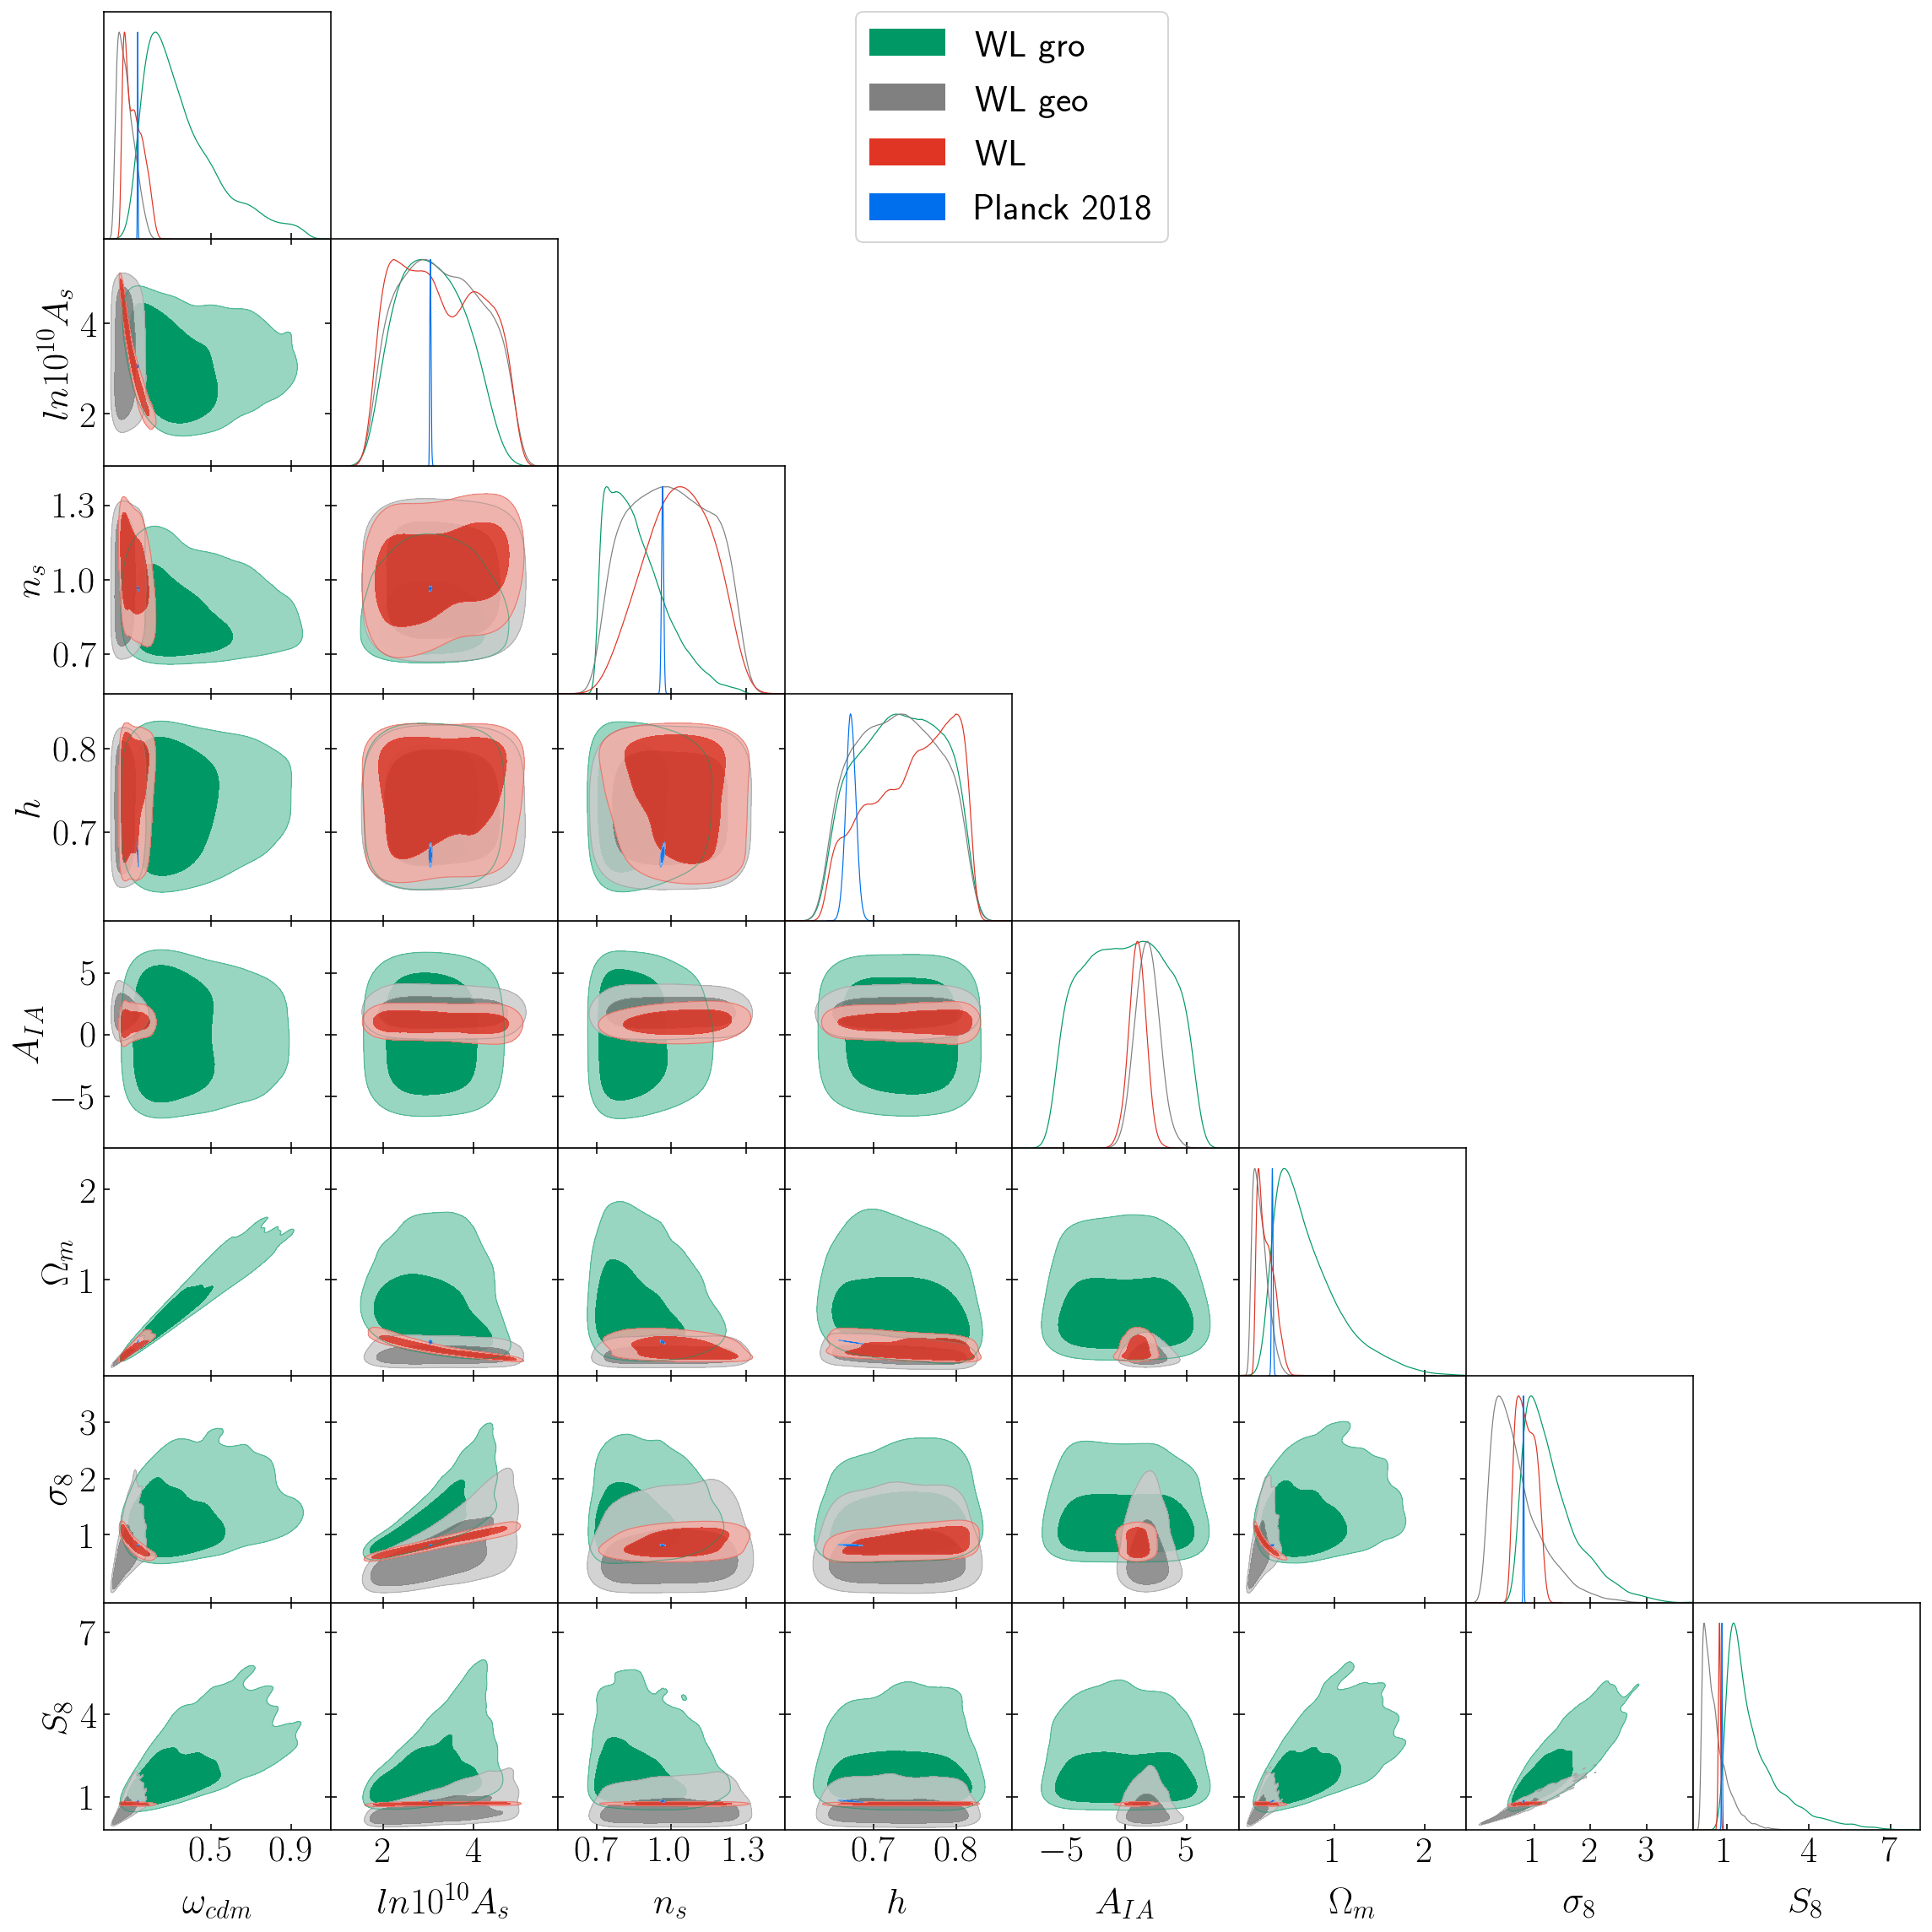

In [21]:
g = plots.getSubplotPlotter()
g.settings.axes_fontsize = 25
g.settings.legend_fontsize = 25
g.settings.axes_labelsize = 25
g.triangle_plot([KV_mark3_gro_getdist, KV_mark3_geo_getdist, KV_getdist, planck_getdist],
                ['omega_cdm', 'ln10^10A_s',  'n_s', 'h', 'A_IA', 'Omega_m', 'sigma8', 'S8'], filled=True)
#[ 'ln10^10A_s', 'n_s', 'h',  'Omega_m', 'sigma8', 'S8'],

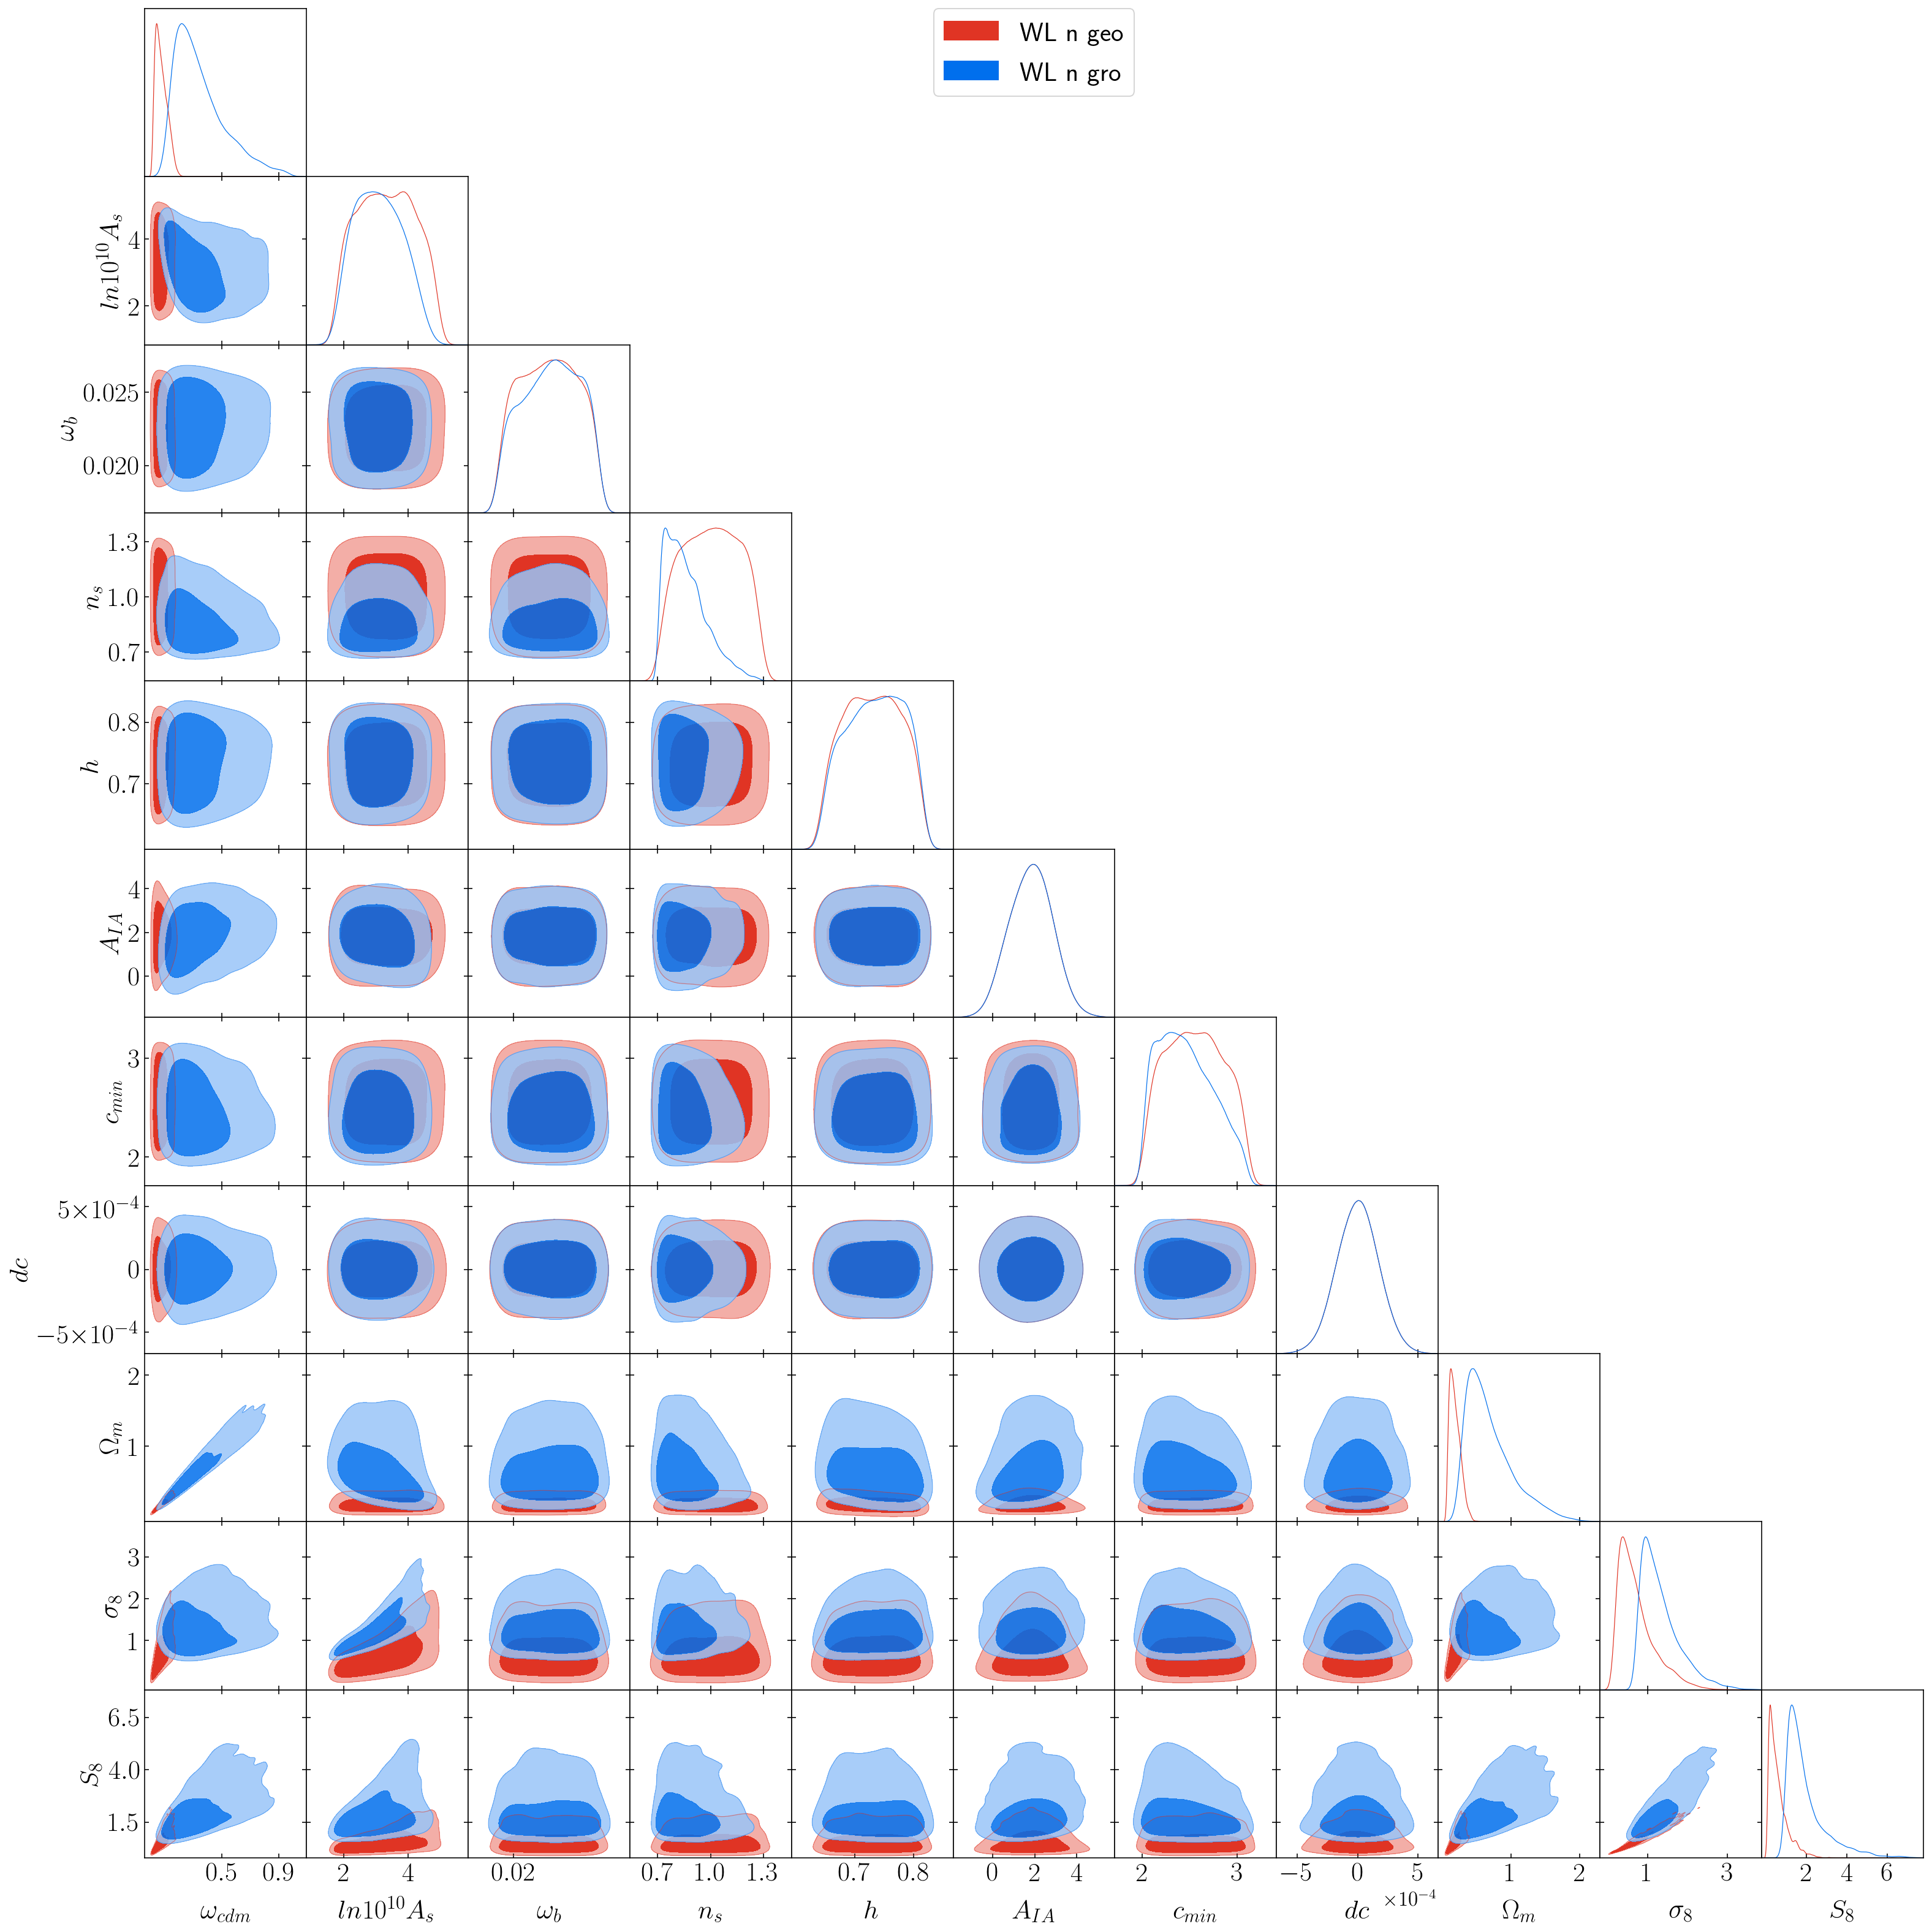

In [22]:
g = plots.getSubplotPlotter()
g.settings.axes_fontsize = 25
g.settings.legend_fontsize = 25
g.settings.axes_labelsize = 25
g.triangle_plot([KV_n_geo_getdist, KV_n_gro_getdist],
                 filled=True)
#[ 'ln10^10A_s', 'n_s', 'h',  'Omega_m', 'sigma8', 'S8'],

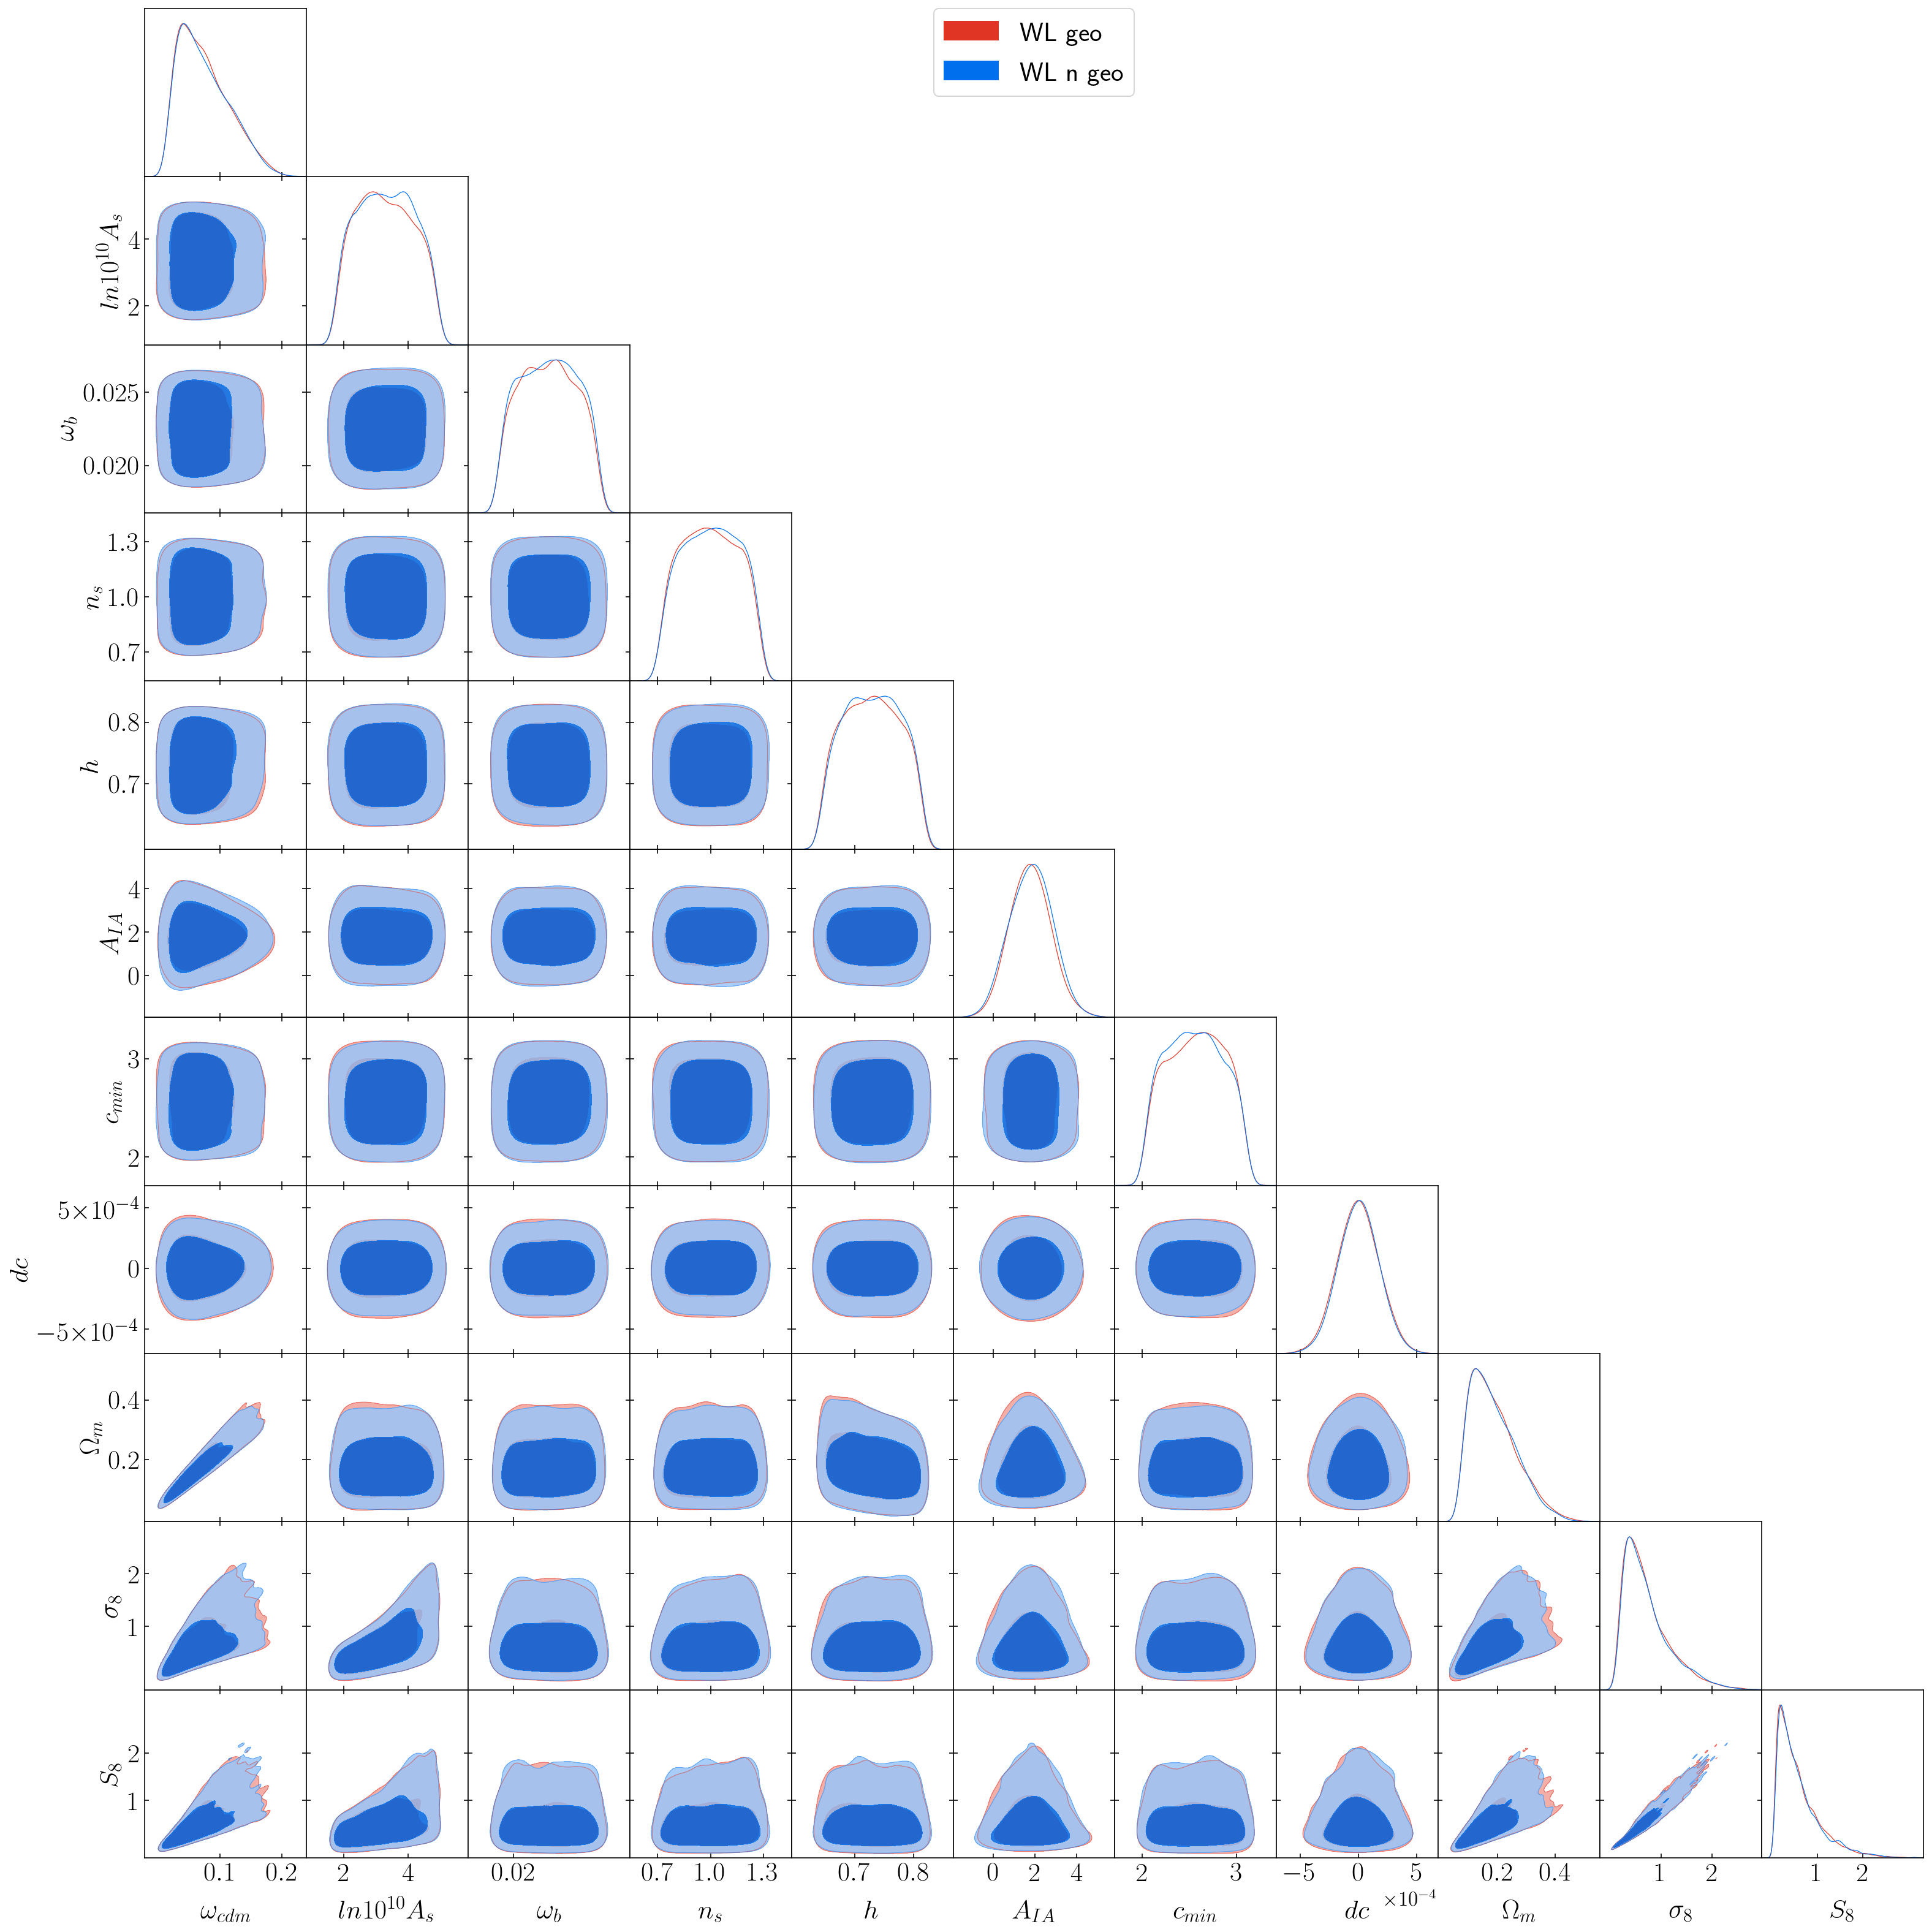

In [23]:
g = plots.getSubplotPlotter()
g.settings.axes_fontsize = 25
g.settings.legend_fontsize = 25
g.settings.axes_labelsize = 25
g.triangle_plot([KV_mark3_geo_getdist, KV_n_geo_getdist],
                 filled=True)
#[ 'ln10^10A_s', 'n_s', 'h',  'Omega_m', 'sigma8', 'S8'],

In [24]:
g.plot_2d([KV_mark3_gro_getdist, KV_mark3_geo_getdist, KV_getdist, planck_getdist], 'Omega_m', 'sigma8', filled=True, lims=[0.05, 0.8, 0.5, 1.8])
g.add_legend(['KV450 Gro', 'KV450 Geo', 'KV450', 'P.18'], legend_loc='upper right');

In [25]:
g.plot_2d([KV_mark3_gro_getdist, KV_mark3_geo_getdist, KV_getdist, planck_getdist],  'sigma8', 'S8', filled=True, lims=[0.4, 1.3, 0.5, 1.22])
g.add_legend(['KV450 Gro', 'KV450 Geo', 'KV450', 'P.18'], legend_loc='upper left');

# KV + Lym

KeyboardInterrupt: 

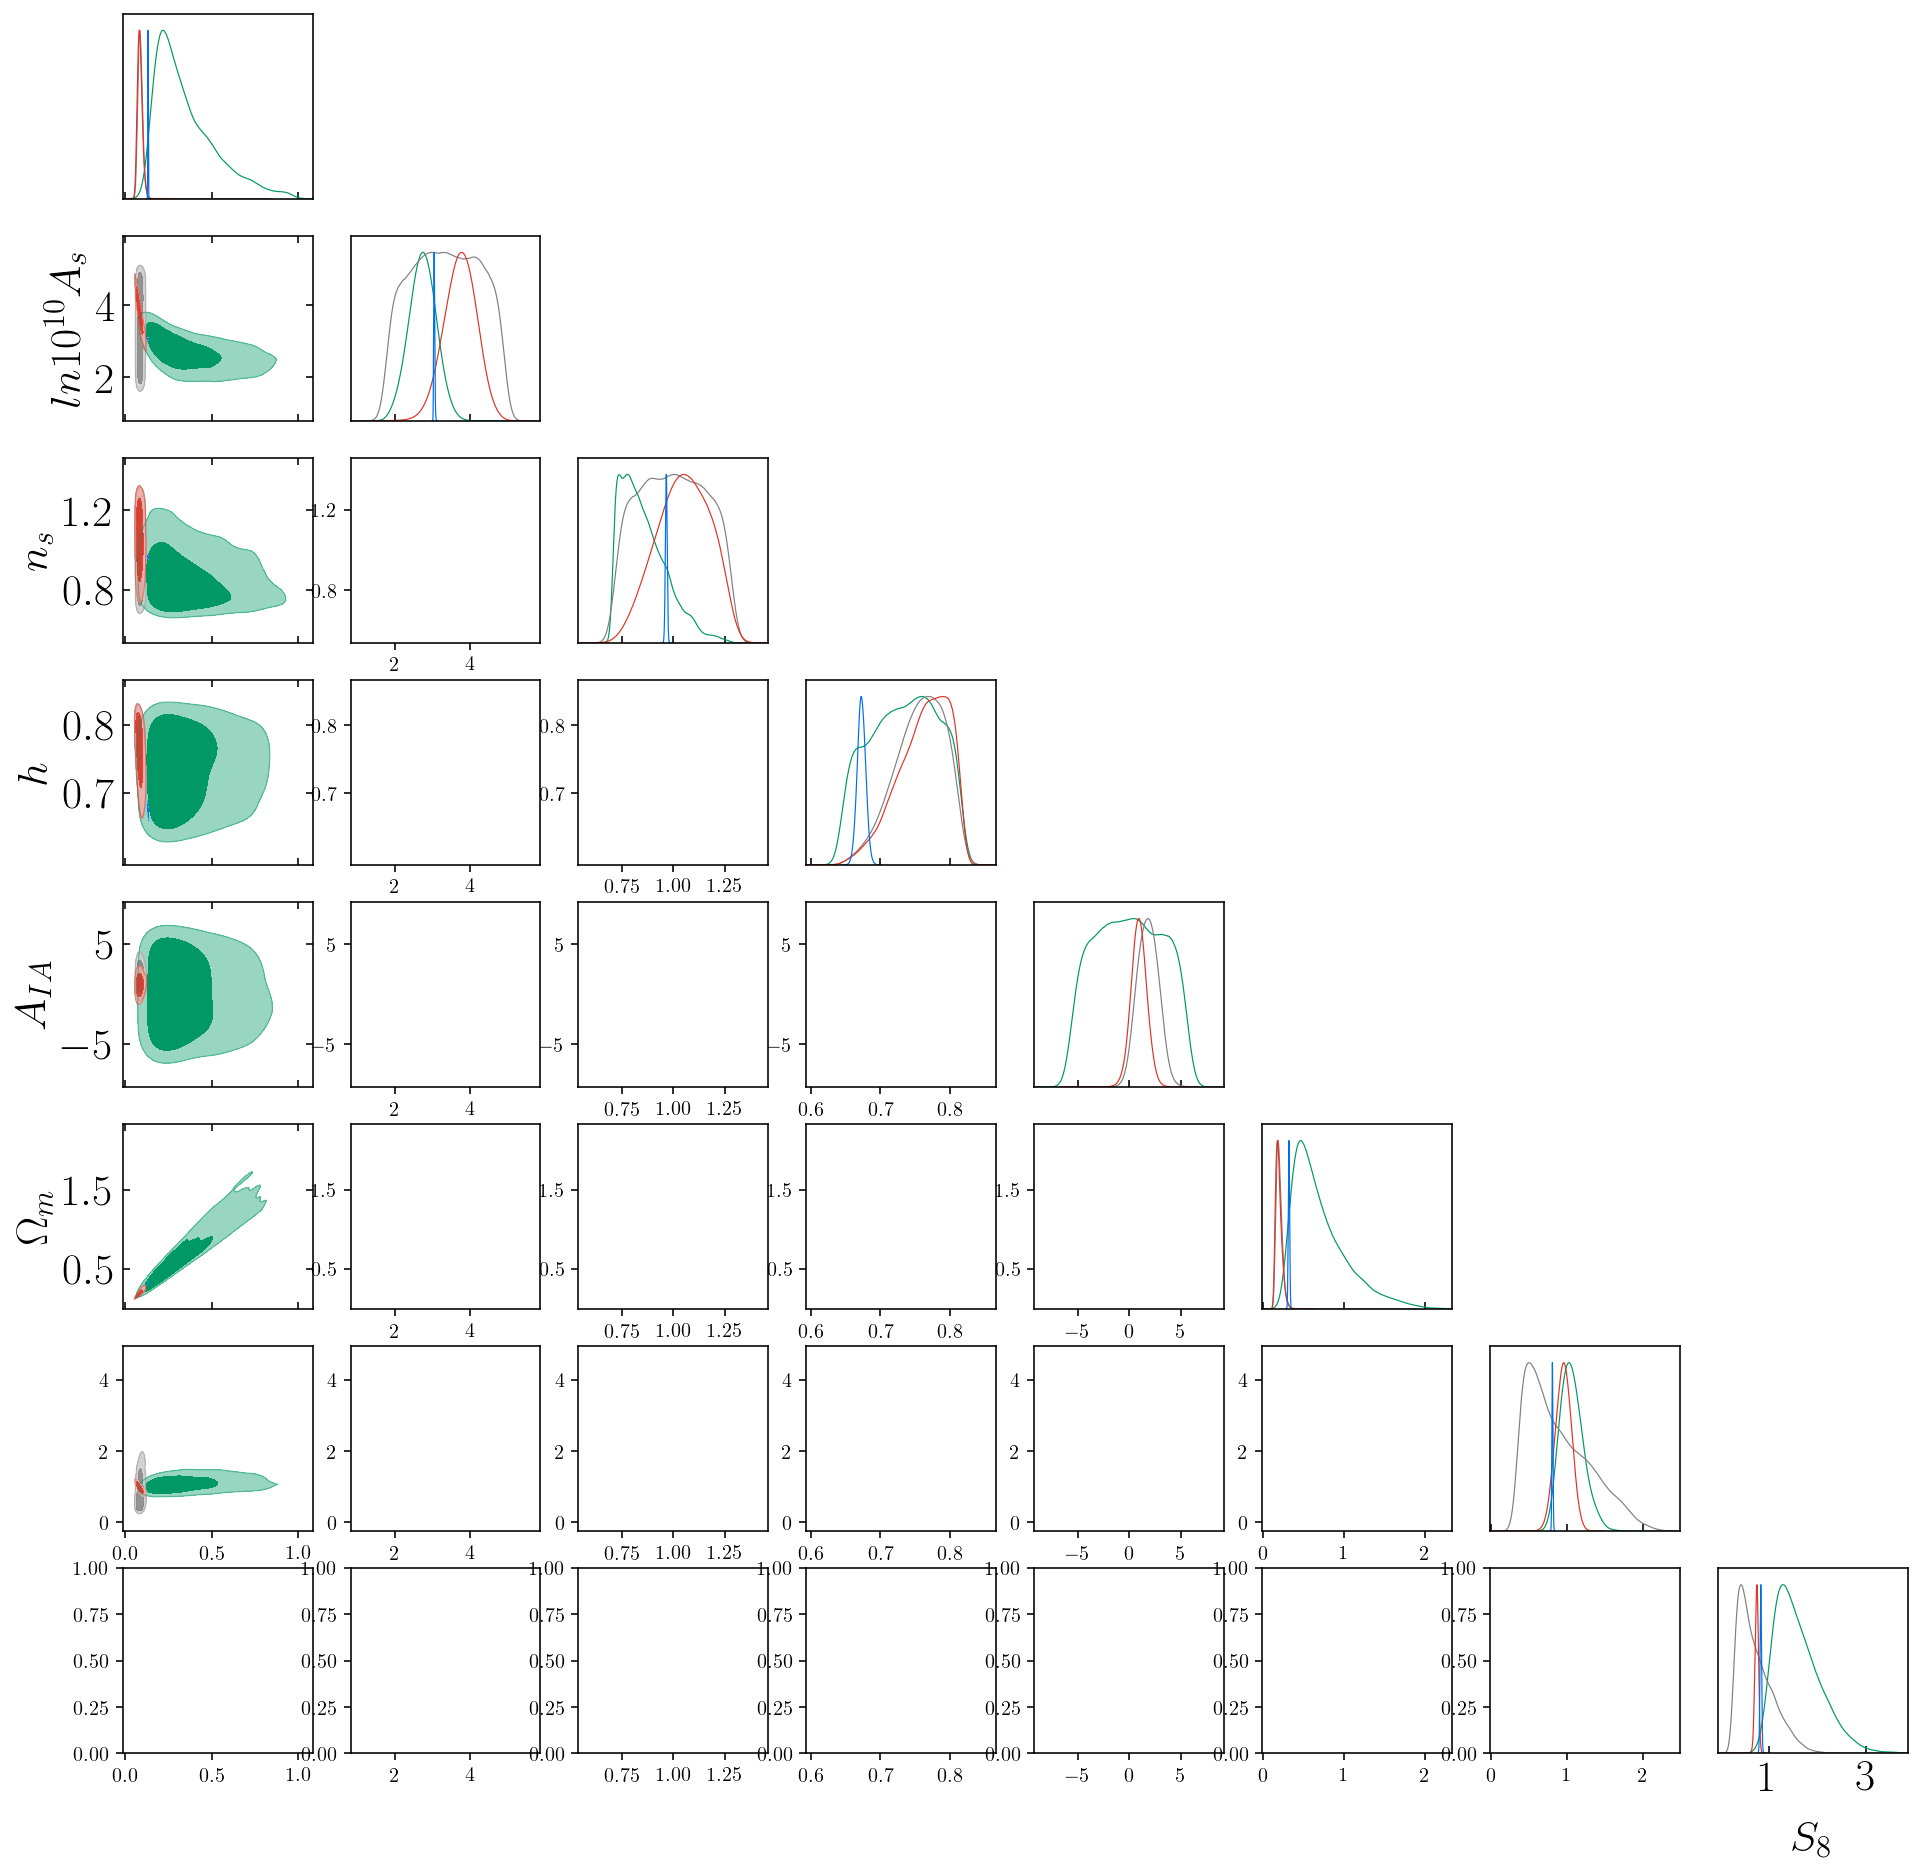

In [26]:
g = plots.getSubplotPlotter()
g.settings.axes_fontsize = 25
g.settings.axes_labelsize = 25
g.triangle_plot([KV_lym_gro_getdist, KV_lym_geo_getdist, KV_lym_getdist, planck_getdist], 
                ['omega_cdm', 'ln10^10A_s',  'n_s', 'h', 'A_IA', 'Omega_m', 'sigma8', 'S8'], filled=True)
#[ 'ln10^10A_s', 'n_s', 'h',  'Omega_m', 'sigma8', 'S8'],

In [ ]:
g.plot_2d([KV_lym_gro_getdist, KV_lym_geo_getdist, KV_lym_getdist, planck_getdist], 'h', 'Omega_m', filled=True, lims=[0.65, 1, 0.05, .3])
g.add_legend(['KV+Lym Gro', 'KV+Lym Geo', 'KV+Lym', 'P.18'], legend_loc='upper right');

In [ ]:
g.plot_2d([KV_lym_gro_getdist, KV_lym_geo_getdist, KV_lym_getdist, planck_getdist], 'Omega_m', 'sigma8', filled=True, lims=[0.05, 0.8, 0.5, 1.8])
g.add_legend(['KV+Lym Gro', 'KV+Lym Geo', 'KV+Lym', 'P.18'], legend_loc='upper right');

In [ ]:
g.plot_2d([KV_lym_gro_getdist, KV_lym_geo_getdist, KV_lym_getdist, planck_getdist],  'h', 'sigma8',  filled=True)
g.add_legend(['KV+Lym Gro', 'KV+Lym Geo', 'KV+Lym', 'P.18'], legend_loc='upper left');

# KV + CMB 

In [ ]:
g = plots.getSubplotPlotter()
g.settings.axes_fontsize=12
g.triangle_plot([KV_cmb_gro_getdist, KV_cmb_geo_getdist, KV_cmb_getdist, planck_getdist], filled=True)
#[ 'ln10^10A_s', 'n_s', 'h',  'Omega_m', 'sigma8', 'S8'],

In [ ]:
g.plot_2d([KV_cmb_gro_getdist, KV_cmb_geo_getdist, KV_cmb_getdist, planck_getdist], 'Omega_m', 'sigma8', filled=True, lims=[0.1, 0.6, 0.5, 1.3])
g.add_legend(['KV+CMB Gro', 'KV+CMB Geo', 'KV+CMB', 'P.18'], legend_loc='upper right');

In [ ]:
g.plot_2d([KV_cmb_gro_getdist, KV_cmb_geo_getdist, KV_cmb_getdist, planck_getdist],  'sigma8', 'S8', filled=True, lims=[0.4, 1.45, 0.5, 1.22])
g.add_legend(['KV+CMB Gro', 'KV+CMB Geo', 'KV+CMB', 'P.18'], legend_loc='upper left');

# KV + Lym + CMB 

In [ ]:
g = plots.getSubplotPlotter()
g.settings.axes_fontsize=12
g.triangle_plot([KV_lymcmb_gro_getdist, KV_lymcmb_geo_getdist, KV_lym_cmb_getdist, planck_getdist], filled=True)
#[ 'ln10^10A_s', 'n_s', 'h',  'Omega_m', 'sigma8', 'S8'],

In [ ]:
g.plot_2d([KV_lymcmb_gro_getdist, KV_lymcmb_geo_getdist, KV_lym_cmb_getdist, planck_getdist], 'Omega_m', 'sigma8', filled=True, lims=[0.05, 0.8, 0.5, 1.8])
g.add_legend(['KV+Lym+CMB Gro', 'KV+Lym+CMB Geo', 'KV+Lym+CMB', 'P.18'], legend_loc='upper right');

In [ ]:
g.plot_2d([KV_lymcmb_gro_getdist, KV_lymcmb_geo_getdist, KV_lym_cmb_getdist, planck_getdist],  'sigma8', 'S8', filled=True, lims=[0.4, 1.45, 0.5, 1.22])
g.add_legend(['KV+Lym+CMB Gro', 'KV+Lym+CMB Geo', 'KV+Lym+CMB', 'P.18'], legend_loc='upper left');

# KvSS

In [ ]:
g = plots.getSubplotPlotter()
g.settings.axes_fontsize = 25
g.settings.legend_fontsize = 25
g.settings.axes_labelsize = 25
g.triangle_plot([  KVSS_mark3_gro_getdist, KVSS_mark3_geo_getdist, KVSS_getdist, planck_getdist],
                ['omega_cdm', 'ln10^10A_s',  'n_s', 'h', 'A_IA', 'Omega_m', 'sigma8', 'S8'], filled=True)
#[ 'ln10^10A_s', 'n_s', 'h',  'Omega_m', 'sigma8', 'S8'],

In [ ]:
g.plot_2d([ KVSS_mark3_gro_getdist, KVSS_mark3_geo_getdist, KVSS_getdist, planck_getdist], 'Omega_m', 'sigma8', filled=True, lims=[0.2, .7, 0.5, 1])
g.add_legend([ 'KvSS Gro', 'KvSS Geo', 'KvSS', 'P.18'], legend_loc='upper right');

In [ ]:
g.plot_2d([KV_getdist, BOSS_getdist, KVSS_getdist, planck_getdist], 'Omega_m', 'sigma8', filled=True, lims=[0.1, .5, 0.5, 1])
g.add_legend(['KV450', 'BOSS', 'KVSS', 'P.18'], legend_loc='upper right');

In [ ]:
g.plot_2d([KVSS_mark3_gro_getdist, KVSS_mark3_geo_getdist, KVSS_getdist, planck_getdist], 'sigma8', 'S8', filled=True, lims=[0.6, 1.1, 0.55, 1.4])
g.add_legend(['KvSS Gro', 'KvSS Geo', 'KvSS', 'P.18'], legend_loc='upper right');

# KvSS + Lyman

In [ ]:
g = plots.getSubplotPlotter()
g.settings.axes_fontsize = 25
g.settings.legend_fontsize = 25
g.settings.axes_labelsize = 25
g.triangle_plot([KVSS_lym_mark3_gro_getdist, KVSS_lym_mark3_geo_getdist, KVSS_lym_getdist, planck_getdist],
                ['omega_cdm', 'ln10^10A_s',  'n_s', 'h', 'A_IA', 'Omega_m', 'sigma8', 'S8'],  filled=True)
#[ 'ln10^10A_s', 'n_s', 'h',  'Omega_m', 'sigma8', 'S8'],

In [ ]:
g.plot_2d([KVSS_lym_mark3_gro_getdist, KVSS_lym_mark3_geo_getdist, KVSS_lym_getdist, planck_getdist], 'Omega_m', 'sigma8', filled=True, lims=[0.15, 0.5, 0.5, 1.1])
g.add_legend(['KvSS+lym Gro', 'KvSS+lym Geo', 'KvSS+lym', 'P.18'], legend_loc='upper right');

In [ ]:
g.plot_2d([KVSS_lym_mark3_gro_getdist, KVSS_lym_mark3_geo_getdist, KVSS_lym_getdist, planck_getdist], 'sigma8', 'S8', filled=True, lims=[0.6, 1.1, 0.55, 1.4])
g.add_legend(['KvSS+lym Gro', 'KvSS+lym Geo', 'KvSS+lym', 'P.18'], legend_loc='upper right');

# KvSS + Lyman + CMB

In [ ]:
g = plots.getSubplotPlotter()
g.settings.axes_fontsize = 25
g.settings.legend_fontsize = 25
g.settings.axes_labelsize = 25
g.triangle_plot([KVSS_lym_CMB_mark3_gro_getdist, KVSS_lym_CMB_mark3_geo_getdist, KVSS_lym_cmb_getdist, planck_getdist], 
                 ['omega_cdm', 'ln10^10A_s',  'n_s', 'h', 'A_IA', 'Omega_m', 'sigma8', 'S8'], filled=True)
##[ 'ln10^10A_s', 'n_s', 'h',  'Omega_m', 'sigma8', 'S8'],

In [ ]:
g.plot_2d([KVSS_lym_CMB_mark3_gro_getdist, KVSS_lym_CMB_mark3_geo_getdist, KVSS_lym_cmb_getdist, planck_getdist], 'Omega_m', 'sigma8', filled=True, lims=[0.15, 0.35, 0.5, 1.2])
g.add_legend(['KvSS+lym+CMB Gro', 'KvSS+lym+CMB Geo', 'KvSS+lym+CMB', 'P.18'], legend_loc='upper left');

In [ ]:
g.plot_2d([KVSS_lym_CMB_mark3_gro_getdist, KVSS_lym_CMB_mark3_geo_getdist, KVSS_lym_cmb_getdist, planck_getdist], 'sigma8', 'S8', filled=True, lims=[0.65, 1., 0.55, 1.1])
g.add_legend(['KvSS+lym+CMB Gro', 'KvSS+lym+CMB Geo', 'KvSS+lym+CMB', 'P.18'], legend_loc='upper left');

## Comp Plots

In [ ]:
lims2 =[0.05, .7, 0.63, .84]
lims3 =[-6, 6, 0.6, 1.5]
lims4 =[0.05, 0.45, 0.05, 1.75]
lims5 =[0.05, 2.45, 0.5, 3]
lims6 =[0.00, 3, 0.5, 6]
#g.settings.labels_size=16

In [ ]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_2d([comp_kv, comp_kvss, comp_kv_lym, comp_kv_cmb, comp_kvss_lym, comp_kvss_lym_cmb ], 'Omega_m_geo', 'Omega_m_gro', lims= lims4, filled=True);

In [ ]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_2d([comp_kv, comp_kvss, comp_kv_lym, comp_kv_cmb, comp_kvss_lym, comp_kvss_lym_cmb], 'sigma8_geo', 'sigma8_gro', lims= lims5, filled=True);

In [ ]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_2d([comp_kv, comp_kvss, comp_kv_lym, comp_kv_cmb, comp_kvss_lym, comp_kvss_lym_cmb], 'S8_geo', 'S8_gro', lims= lims6, filled=True);

In [ ]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_2d([KVSS_lym_CMB_mark3_gro_getdist, KVSS_lym_CMB_mark3_geo_getdist, KVSS_lym_cmb_getdist, planck_getdist], 'A_IA', 'S8', lims= lims3, filled=True);

In [ ]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_2d([KVSS_lym_mark3_gro_getdist, KVSS_lym_mark3_geo_getdist, KVSS_lym_getdist, planck_getdist],  'A_IA', 'S8', lims= lims3, filled=True);

In [ ]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_2d([KVSS_mark3_gro_getdist, KVSS_mark3_geo_getdist, KVSS_getdist, planck_getdist],  'A_IA', 'S8', lims= lims3, filled=True);

In [ ]:
g = plots.get_single_plotter()
g.settings.axes_fontsize=20
g.settings.axes_labelsize = 20
g.plot_2d([KV_mark3_gro_getdist, KV_mark3_geo_getdist, KV_getdist, planck_getdist],  'A_IA', 'S8', lims= lims3, filled=True);

In [ ]:
lims1 = [0.05, .7, 0.5, 1.3]

In [ ]:
g = plots.get_single_plotter()
g.plot_2d([KVSS_lym_CMB_mark3_gro_getdist, KVSS_lym_CMB_mark3_geo_getdist, KVSS_lym_cmb_getdist, planck_getdist], 'Omega_m', 'sigma8', filled=True, lims=lims1);

In [ ]:
g = plots.get_single_plotter()
g.plot_2d([KVSS_lym_mark3_gro_getdist, KVSS_lym_mark3_geo_getdist, KVSS_lym_getdist, planck_getdist], 'Omega_m', 'sigma8', filled=True, lims=lims1);

In [ ]:
g = plots.get_single_plotter()
g.plot_2d([KVSS_mark3_gro_getdist, KVSS_mark3_geo_getdist, KVSS_getdist, planck_getdist], 'Omega_m', 'sigma8', filled=True, lims=lims1);

In [ ]:
g = plots.get_single_plotter()
g.plot_2d([KV_mark3_gro_getdist, KV_mark3_geo_getdist, KV_getdist, planck_getdist], 'Omega_m', 'sigma8', filled=True, lims=lims1);

# Comp Plot 2 

In [ ]:
limsh = [0.6, .85]
limsw = [0., .7]
limss = [0.2, 1.4]




In [ ]:
g = plots.get_single_plotter()
g.plot_1d([KV_mark3_gro_getdist, KV_mark3_geo_getdist, KV_getdist, planck_getdist], 'sigma8', lims=limss,         
line_args=[ {'lw':1.5, 'color':'green'}, {'lw':1.5, 'color':'black'},
               {'lw':1.5, 'color':'red'}, {'lw':1.5, 'color':'blue'}])

In [ ]:
g = plots.get_single_plotter()
g.plot_1d([KVSS_mark3_gro_getdist, KVSS_mark3_geo_getdist, KVSS_getdist, planck_getdist], 'sigma8' ,lims=limss, 
         line_args=[ {'lw':1.5, 'color':'green'}, {'lw':1.5, 'color':'black'},
               {'lw':1.5, 'color':'red'}, {'lw':1.5, 'color':'blue'}])

In [ ]:
g = plots.get_single_plotter()
g.plot_1d([KVSS_lym_mark3_gro_getdist, KVSS_lym_mark3_geo_getdist, KVSS_lym_getdist, planck_getdist], 'sigma8' , lims=limss,
         line_args=[ {'lw':1.5, 'color':'green'}, {'lw':1.5, 'color':'black'},
               {'lw':1.5, 'color':'red'}, {'lw':1.5, 'color':'blue'}])

In [ ]:
g = plots.get_single_plotter()
g.plot_1d([KVSS_lym_CMB_mark3_gro_getdist, KVSS_lym_CMB_mark3_geo_getdist, KVSS_lym_cmb_getdist, planck_getdist], 'sigma8', lims=limss, 
         line_args=[ {'lw':1.5, 'color':'green'}, {'lw':1.5, 'color':'black'},
               {'lw':1.5, 'color':'red'}, {'lw':1.5, 'color':'blue'}])

In [ ]:
#KV_mark3_gro_getdist, KV_mark3_geo_getdist
#KVSS_mark3_gro_getdist, KVSS_mark3_geo_getdist
#KVSS_lym_mark3_gro_getdist, KVSS_lym_mark3_geo_getdist
#KVSS_lym_CMB_mark3_gro_getdist, KVSS_lym_CMB_mark3_geo_getdist
print(KVSS_lym_CMB_mark3_geo_getdist.getMargeStats())

In [ ]:
print(planck_ .getMargeStats())

In [ ]:
 1.5814602E-02**2

In [ ]:
def diff_g(mean1, mean2, std1, std2):
    var1 = std1**2
    var2 = std2**2
    t = abs( mean1 - mean2)/(np.sqrt(var1 + var2))
    return t 

In [ ]:
diff_g(1.5927014E+00,  7.4969477E-01   ,4.7279548E-01 ,   3.5233180E-02  )